# Analysis on Vehicle Price from Car-Dekho Dataset

Importing Libraries

In [1]:
#importing python libraries for data manipulation and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')



In [2]:
#To display all columns in the dataset.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading dataset

In [3]:
#importing dataset
dataset = pd.read_csv('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\Data\\Car-details-v3.csv')

#understanding about the data
df = dataset.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


The datasets consist of several independent variables include:

Car_Name : This column represents the name of the car.

Year : This column represents the year in which the car was bought.

Selling_Price : This column represents the price the owner wants to sell the car at.

Present_Price : This is the present price of the car.

Kms_Driven : This is the distance completed by the car in km.

Fuel_Type : Fuel type of car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had

Shape of the dataframe

In [4]:
#shape and size of the dataframe
print('shape of the dataset in rows and columns',df.shape)
print('size of the dataset: rows*columns',df.size)

shape of the dataset in rows and columns (8128, 13)
size of the dataset: rows*columns 105664


Understanding about the dataset:

In [5]:
#non-null count values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


From the dataset, we can observe that data have 8128 rows and 13 columns. There are 9 categorical columns and 4 numeric columns and observe that there are no missing values in the data.

In [6]:
#gives the statistiscal information of data
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
#column names of the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
#categorical variables in dataset
c_var = [cat_var for cat_var in df.columns if df[cat_var].dtypes =='O']
print('categorical variables in the dataset', c_var)

categorical variables in the dataset ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [9]:
#numerical variables in dataset
n_var = [num_var for num_var in df.columns if df[num_var].dtypes!='O']
print('numerical variables in the dataset', n_var)

numerical variables in the dataset ['year', 'selling_price', 'km_driven', 'seats']


# DATA PREPROCESSING

Data Cleaning

In [10]:
##isnull function checks the null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
# We can also use the mean() method after isnull()
# to obtain the fraction of missing values:
#df.isnull().mean()

There are non null values present in the columns. In this regression model the dependent variable will be 'Selling_price' rest all the variables will be considered as independent variables. For buliding linear regression model we need all numerical variables, so the features containing object datatype are either converted or dropped.

In [12]:
#check missing values percentage in each column
print(df.isnull().mean().mul(100))

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


In [13]:
#droping the variables which as Maximum number of null values.
df = df.drop(columns=['mileage','torque', 'seats', 'name','max_power', 'engine'], axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [14]:
df.dropna(inplace=True)
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

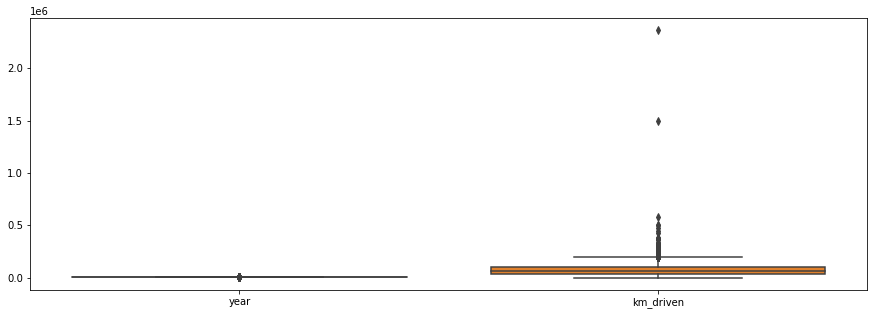

In [15]:
#from the boxplot we can see the outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df.drop(columns=['selling_price']))

In [16]:
#identifying the outliers
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr =  q3 - q1

upper_fence = q3+(1.5*iqr)
lower_fence = q1-(1.5*iqr)
print("iqr:{}, ul:{}, ll:{}".format(iqr,upper_fence,lower_fence))

iqr:63000.0, ul:192500.0, ll:-59500.0


In [17]:
#checking the number of outliers
print('number of outliers above the UF',df[df['km_driven']>upper_fence].count()['km_driven'])
print('number of outliers below the LF',df[df['km_driven']<lower_fence].count()['km_driven'])

#outlier removal from the Km_driven variable using IQR
df_X = df[df['km_driven']<upper_fence]
df = df_X
df.head()

number of outliers above the UF 170
number of outliers below the LF 0


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,2007,130000,120000,Petrol,Individual,Manual,First Owner


Data Visualization using D-tale Library:

<AxesSubplot:ylabel='Density'>

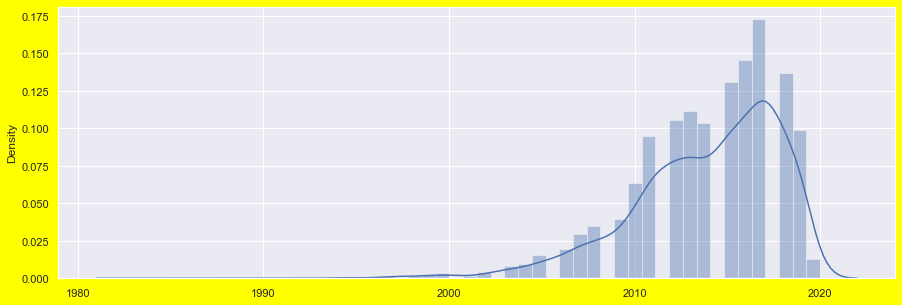

In [18]:
#visualization of data
sns.set(rc={'figure.facecolor':'yellow'})
plt.figure(figsize=(15,5))
sns.distplot(x=df['year']) #year variable is left skewed

<AxesSubplot:xlabel='km_driven', ylabel='Density'>

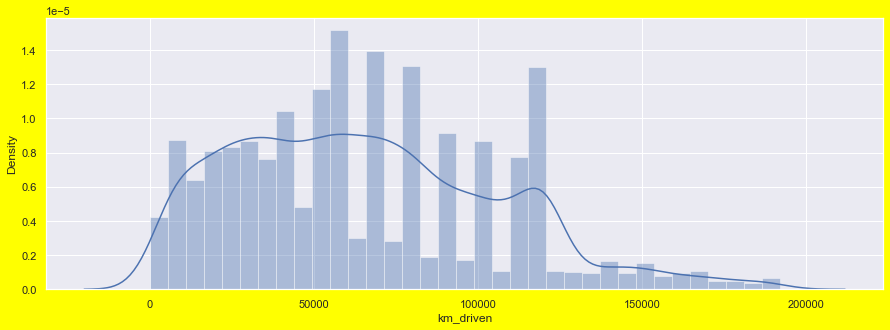

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['km_driven']) #after removed outliers, the data distribution is almost normally distributed

<AxesSubplot:xlabel='fuel', ylabel='count'>

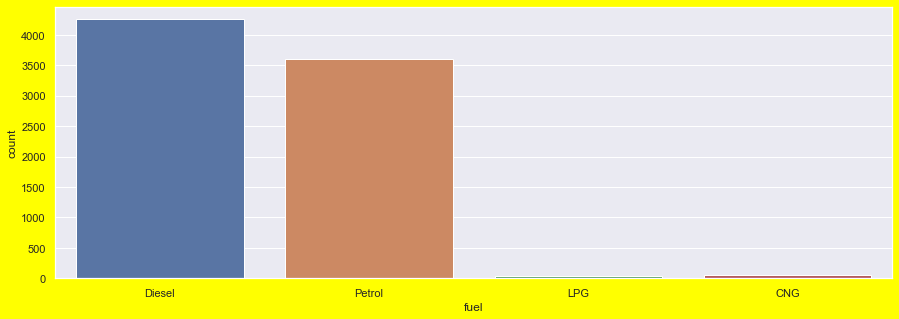

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(df['fuel'])

Most of the cars owned by the people are of Diesel Type.
People are buying more Diesel Cars then Petrol, LPG and CNG.

<AxesSubplot:xlabel='owner', ylabel='count'>

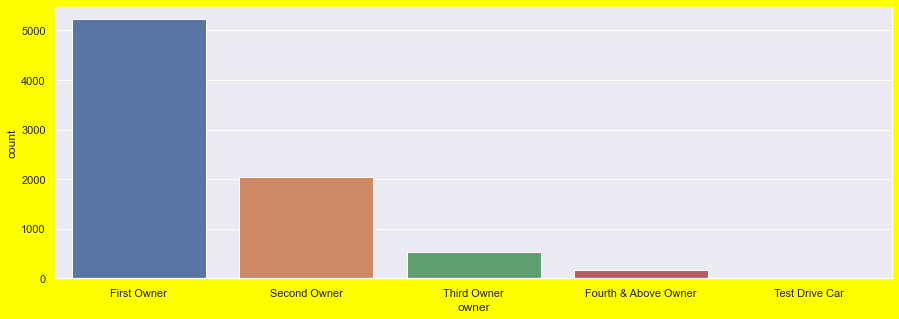

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df['owner'])

Most of the cars are owned by the first owner.
Second-hand cars are less in number compared to first owner.

Text(0.5, 1.0, 'year vs. selling price')

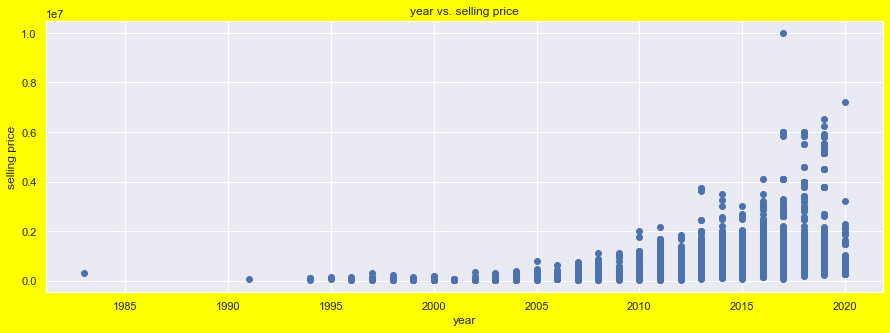

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(df['year'], df['selling_price']) 
plt.xlabel('year')
plt.ylabel('selling price')
plt.title('year vs. selling price')

Text(0.5, 1.0, 'km dripven vs. selling price')

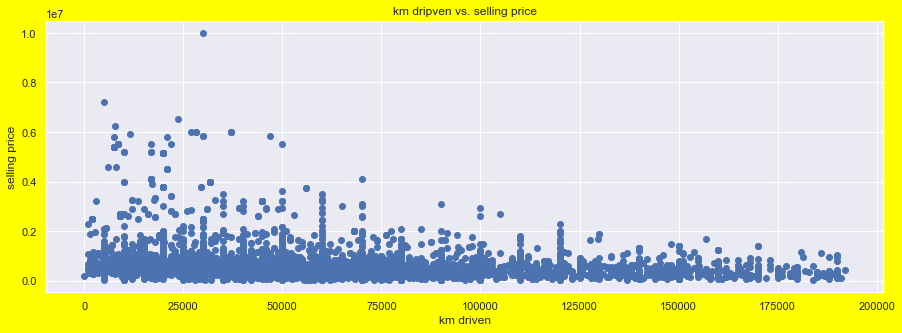

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(df['km_driven'], df['selling_price']) 
plt.xlabel('km driven')
plt.ylabel('selling price')
plt.title('km dripven vs. selling price')

The older the car, the lesser the selling price. As the km driven increases, the selling price of the car decreases



<AxesSubplot:xlabel='seller_type', ylabel='count'>

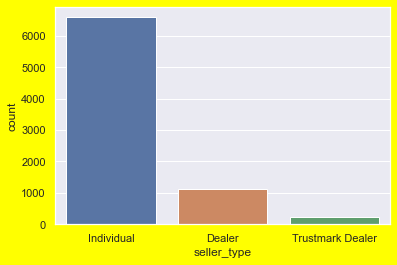

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(df['seller_type'])

Most of the seller type is Individual only.


The diesel cars are having the highest selling price with most number of outliers being present.


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

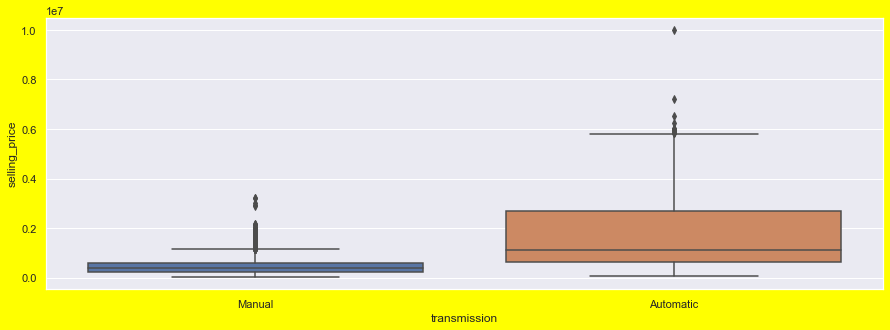

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['transmission'], y=df['selling_price'])

Automatic cars are expensive than manual cars.

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

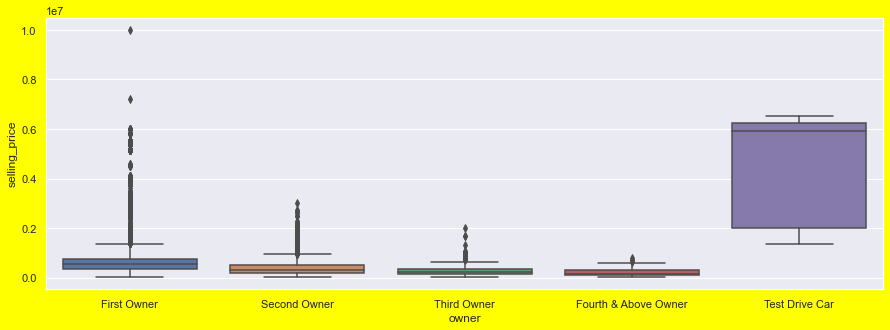

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['owner'], y=df['selling_price'])

Multivariate Analysis

<Figure size 1080x360 with 0 Axes>

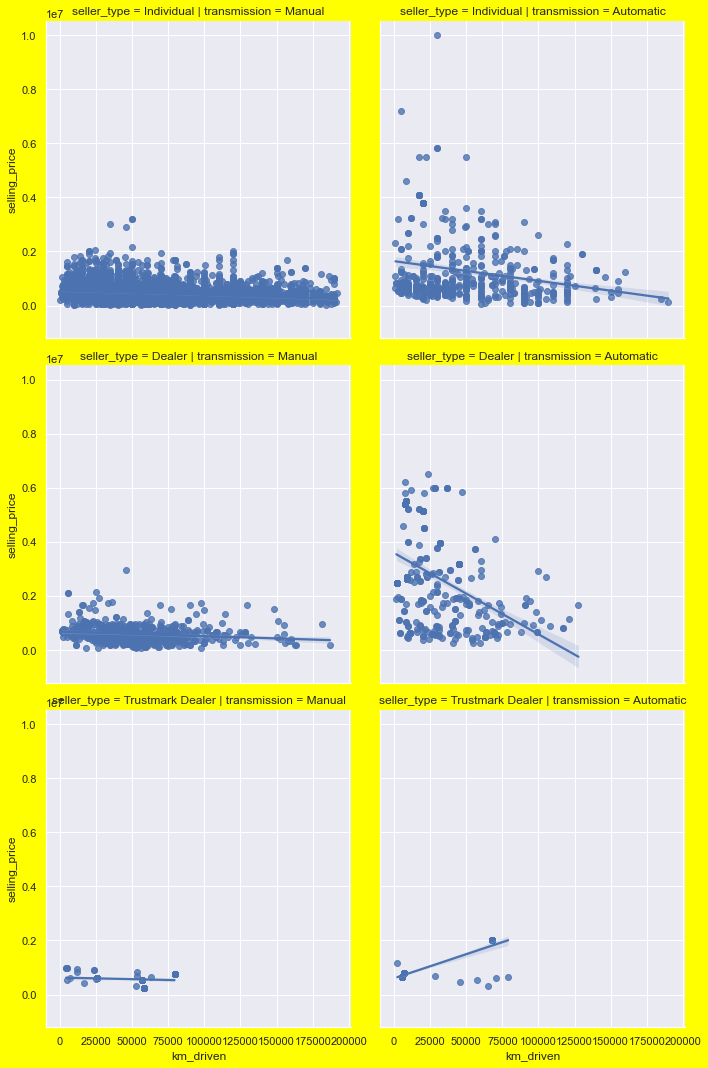

In [27]:
plt.figure(figsize=(15,5))
sns.lmplot(x='km_driven', y='selling_price', data=df, col='transmission', row='seller_type')

# DATA TRANSFORMATION

Converting categorical variables to dummy variables

In [28]:
print(df.fuel.value_counts())
print('--------------------------')
print(df.transmission.value_counts())
print('-----------------------------')
print(df.seller_type.value_counts())
print('------------------------------')
print(df.owner.value_counts())

Diesel    4254
Petrol    3611
CNG         56
LPG         37
Name: fuel, dtype: int64
--------------------------
Manual       6912
Automatic    1046
Name: transmission, dtype: int64
-----------------------------
Individual          6598
Dealer              1124
Trustmark Dealer     236
Name: seller_type, dtype: int64
------------------------------
First Owner             5219
Second Owner            2037
Third Owner              535
Fourth & Above Owner     162
Test Drive Car             5
Name: owner, dtype: int64


In [29]:
df_encoding = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
df_encoding.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0,0,1,1,0,1,0,0,0,0


Non-Null Count values:

In [30]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   year                          7958 non-null   int64
 1   selling_price                 7958 non-null   int64
 2   km_driven                     7958 non-null   int64
 3   fuel_Diesel                   7958 non-null   uint8
 4   fuel_LPG                      7958 non-null   uint8
 5   fuel_Petrol                   7958 non-null   uint8
 6   seller_type_Individual        7958 non-null   uint8
 7   seller_type_Trustmark Dealer  7958 non-null   uint8
 8   transmission_Manual           7958 non-null   uint8
 9   owner_Fourth & Above Owner    7958 non-null   uint8
 10  owner_Second Owner            7958 non-null   uint8
 11  owner_Test Drive Car          7958 non-null   uint8
 12  owner_Third Owner             7958 non-null   uint8
dtypes: int64(3), uint8(10)
memory usa

In [31]:
print('shape of the dataset after categorical encoding',df_encoding.shape)

shape of the dataset after categorical encoding (7958, 13)


Heatmap: Heatmaps are used to observe the correlations among the feature variables and null values among the variables

In [32]:
# plt.figure(figsize=(15,5))
# sns.heatmap(df_encoding.isnull(), annot=True)

In [33]:
df_encoding.corr()>0.5
#The target variable Selling Price is highly correlated with:
#Fuel Type
#Seller Type

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
year,True,False,False,False,False,False,False,False,False,False,False,False,False
selling_price,False,True,False,False,False,False,False,False,False,False,False,False,False
km_driven,False,False,True,False,False,False,False,False,False,False,False,False,False
fuel_Diesel,False,False,False,True,False,False,False,False,False,False,False,False,False
fuel_LPG,False,False,False,False,True,False,False,False,False,False,False,False,False
fuel_Petrol,False,False,False,False,False,True,False,False,False,False,False,False,False
seller_type_Individual,False,False,False,False,False,False,True,False,False,False,False,False,False
seller_type_Trustmark Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False
transmission_Manual,False,False,False,False,False,False,False,False,True,False,False,False,False
owner_Fourth & Above Owner,False,False,False,False,False,False,False,False,False,True,False,False,False


In [34]:
df_encoding.isnull().sum().sum()

0

In [35]:
#!pip install statsmodels
#!pip install scipy
# import scipy 
# scipy.stats.ttest_1samp(a=df_encoding['selling_price'],popmean=5.5)

In [36]:
#pd.pivot(data=df_encoding,columns='selling_price',index='year')

Saving EDA data to a pickle file and in CSV file

In [37]:
with open('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\models\\ExplorataryDataAnalysis.pkl', 'wb') as file:
    pickle.dump(df_encoding, file)

#loading a pickle file from models directory
eda_file=pickle.load(open('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Dataset\\models\\ExplorataryDataAnalysis.pkl', 'rb'))
df_eda = eda_file
df_eda.head()

#df_en = pd.to_pickle(df_encoding, 'C:\\Users\\acer\\Desktop\\Car_Dekho_DataSet\\models\\EDA.pkl')
#dfkk=pd.read_pickle('C:\\Users\\acer\\Desktop\\Car_Dekho_DataSet\\models\\EDA.pkl')

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0,0,1,1,0,1,0,0,0,0


In [38]:
#saving EDA file in CSV format in data directory
df_encoding.to_csv('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Data\\Data\\EDA_dataset.csv')
df_csv = pd.read_csv('C:\\Users\\rakhi\\OneDrive\\Desktop\\Car Dekho Data\\Data\\EDA_dataset.csv')
df_csv.head()

OSError: Cannot save file into a non-existent directory: 'C:\Users\rakhi\OneDrive\Desktop\Car Dekho Data\Data'